# Project Name: Reducing Wireless Communication Traffic in Smart City Systems Using Artificial Neural Networks Approach

## Creating a Multi-output classifier with Keras (Artificial neural network Multi-output classifier )

# The Aim of the project: 

1- Appropriate network traffic type selection for a priority device

2-	Accurately predicting the device or service and assigning enough resources to that device in accordance with traffic forecast

3-	 Modification of network assignments in the event of a network failure

The main objective of this project is to prevent and improve traffic for wireless communications in smart city systems, especially the fifth generation, while giving priority to critical services that need speed of analysis and great communication with the rest of the devices. It also gives the station the decision to regulate traffic congestion through delivery between stations


# Datatset Defination :

Our dataset includes (https://www.kaggle.com/datasets/puspakmeher/networkslicing) the most important network and device KPIs, such as the type of connecting device (such as a smartphone, Internet of Things device, URLLC device, etc.), User Equipment (UE) category,GBR - Guaranteed Bit Rate , packet delay budget, maximum packet loss, time and day of the week, etc. Control packets sent between the UE and network can be used to record these KPIs. 

1- First column refer to the use case in which the smartphone here refer to the user how use the phone  Healthcare - Usage in Healthcare ,Industry 4.0 - Usage in Digital Enterprises, IoT Devices – Usage Public Safety - Usage for public welfare and safety purposes,   Smart City & Home - usage in daily household chores, Smart Transportation - usage in public transportation , Smartphone - whether used for smartphone cellular data

2-	The second input shows LTE/5g - User Equipment categories or classes to define the performance specifications . It is known commercially and industrially. Each device has special details that are different from others. These details are specified by the manufacturers, classified from 1 to 20. 

3-	The third input is about the protocol that used by each use case , as each use case has own protocol in order to deal with it in a separate way, where each service or condition needs a different analytical method, for example, dealing with mobile phones is done differently from Internet of Things devices such as the car or the stop alarm

4-	The fourth and fifth inputs refer to the observe what time and day of the week is the request received in the system . This observations are taken within all week from Saturday to Friday and for whole hours  (24/7) 

5-	The sixth input : GBR - Guaranteed Bit Rate : Guaranteed Bit Rate, or GBR, refers to the UE's promise of a specific bit rate for the bearer. This function is necessary to make clear that sometimes the supplied data is little, but it is very significant and needs to be received and processed immediately.

6-	The seventh input: Packet Loss Rate - divided by the total number of packets transmitted, is the number of packets that were not received.

7-	The eight input: Packet Delay - the moment when a packet is received.

8-	The output , Traffic type:  Our pre-defined traffic type  include enhanced Mobile Broad Band (eMBB) such as smart phones and VR/AR applications  , Ultra Reliable Low Latency Communication (URLLC) such as transportation system and   , massive Machine Type Communication (mMTC

Therefore,

The Target Output of the dataset contains Three classes.

I. Mobile Broad Band (eMBB)

II. Ultra Reliable Low Latency Communication (URLLC)

III. massive Machine Type Communication (mMTC)



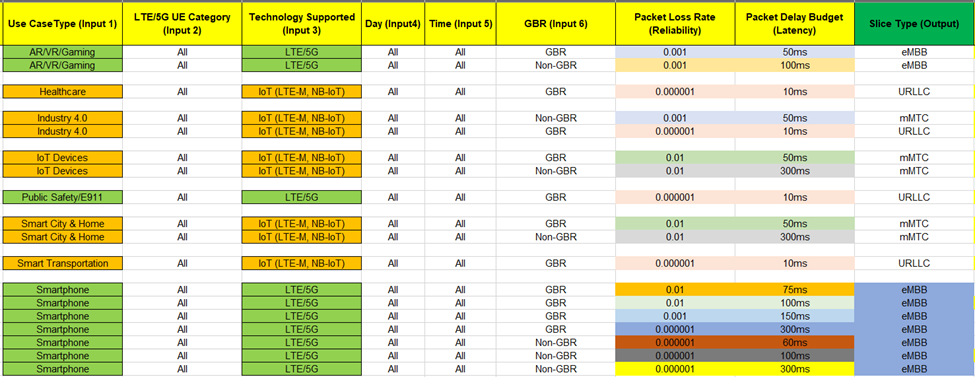

# Roadmap

We create a model after becoming acquainted with the model's architecture.

1-	Keras neural network for multi-class  . 

2-	 For data preparation, we perform various steps, including encoding, splitting, selecting, and scaling the data

3-	Then, we define the first layer of the MLP- ANN , where the inputs will be variables depending on the dataset used, for example, we will test the dataset with eight  features, then the number 
 Afterward, we define a model architecture with multiple layers and three output neurons in the last layer. After configuring the model architecture, we train the model with the datasets 


__An effective and user-friendly Python library for ANN is called Keras. When designing and setting up your ANN models, many choices must be made. The majority of these choices must be made empirically, by learning from mistakes and basing conclusions on actual data. As a result, it is crucial to have a reliable method of assessing the effectiveness of your ANN models. We will learn how to assess the Multi-Class Classification using the Keras Deep Learning Library in this subsection.__

__A multi-class classification problem must first be established, which means that more than two classes must be expected. The three categories (eMBB, URLLC, and mMTC) are really dispersed based on the use case and other features that will decide the priority in receiving and delivery. The three class values call for particular processing, making this a crucial obstacle for neural network training__


# Imports

Importing all of the necessary Python dependencies is the first step.

1- Pandas and Numpy will be used along with the other four tools to read and process the dataset. 

2- Sklearn is generally used for activities relating to data pretreatment and preparation. We may import data from Sklearn and create train test split, which allows us to divide the data into a training dataset and a testing dataset. We will also use metrics for performance evaluations from Sklearn. 

3-Tensorflow for neural networks is the last. We will build our neural network using Dense (i.e. densely-connected) layers from the Sequential API of Tensorflow. We compute loss using categorical crossentropy and optimize using SGD

4- To analyze the performance visually, the plot function from matplotlib will be used to plot the val accuracy and train accuracy curves

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Importing and Explore the Datasets

- the next step is Importing and reading the datasets using pandas , where the relevant dataset has been saved in CSV format  In addition, a full details are presented  about the type of datasets used and to give a broad overview of its size in terms of the number of features and samples .

- To this end,   we print a quick overview of the data using data.info() function furthermore, using the data.head() code in order to display the first five rows and how our data frame look. Using a function “unique”,to identify  the number of categories\strings in the dataset can be known easily  , in addition to repeating each category in all own column.  Furthermore, by closely looking at the results, the data has four column with categorical data 

In [2]:
data = pd.read_csv('dataset_project.csv')  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63167 entries, 0 to 63166
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       63167 non-null  int64  
 1   Packet Loss Rate      63167 non-null  float64
 2   Time                  63167 non-null  int64  
 3   Packet delay          63167 non-null  int64  
 4   Technology Supported  63167 non-null  object 
 5   Day                   63167 non-null  object 
 6   GBR                   63167 non-null  object 
 7   Use Case              63167 non-null  object 
 8   slice Type            63167 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.3+ MB


The result of printing the” info” function that the data set consists of four columns with a string categorical , and the same is the case with the outputs. Where it can be dealt with the categorical dataset using encoding techniques as will be explained later. 

In [57]:
print(data.nunique())

LTE/5g Category         22
Packet Loss Rate         3
Time                    24
Packet delay             7
Technology Supported     2
Day                      7
GBR                      2
Use Case                 8
slice Type               3
dtype: int64


In [4]:
data.head()

,LTE/5g Category,Packet Loss Rate,Time,Packet delay,Technology Supported,Day,GBR,Use Case,slice Type
0,1,0.01,1,100,LTE/5G,sunday,Non-GBR,Smartphone,eMBB
1,1,0.01,2,100,LTE/5G,sunday,Non-GBR,Smartphone,eMBB
2,1,0.01,3,100,LTE/5G,sunday,Non-GBR,Smartphone,eMBB
3,1,0.01,4,100,LTE/5G,sunday,Non-GBR,Smartphone,eMBB
4,1,0.01,5,100,LTE/5G,sunday,Non-GBR,Smartphone,eMBB


# Identify Anomalies/ Missing Data

These dataset is KPIs data it can be captured from control packets between the UE and base station  Therefore, this dataset is real-time measured data ,there are not any data points that immediately appear as anomalous and no duplicating or missing data in any of the measurement columns. To verify our claim, the actual codes of the null and duplicate with sum function in order to display the total sum of the null and duplicatioed values the codes are written here

In [6]:
print(data.duplicated().sum(0))


0


In [7]:
print(data.isnull().sum(0))

LTE/5g Category         0
Packet Loss Rate        0
Time                    0
Packet delay            0
Technology Supported    0
Day                     0
GBR                     0
Use Case                0
slice Type              0
dtype: int64


As shown , there is no null data points and no dublication that verfiy our claim. 

# Features and Targets and Convert Data to Arrays 

1- The data must now be divided into features and targets. The class we wish to forecast is known as the target or label. As the target column represents traffic types, which contains three different groups and classes that were previously mentioned, this project suggests eight features from the relevant dataset that will work in concert to forecast the last column, which represents the target output.

2- Then, We will also convert the Pandas data frames to Numpy arrays using( Valus function )because that is the way the algorithm works. For our dataset ,select all rows and the first 8 columns (from 0 to 8) to X and all rows and the last one column (from 8 to 10)  as y . As shown below. 


In [9]:
# Pandas format 
X = data.iloc[:,0:8]
y = data.iloc[:,8:10]

In [10]:
# We print the inputs or features 
print (X)

       LTE/5g Category  Packet Loss Rate  Time  Packet delay  \
0                    1          0.010000     1           100   
1                    1          0.010000     2           100   
2                    1          0.010000     3           100   
3                    1          0.010000     4           100   
4                    1          0.010000     5           100   
...                ...               ...   ...           ...   
63162               22          0.000001    19            10   
63163               22          0.000001    20            10   
63164               22          0.000001    21            10   
63165               22          0.000001    22            10   
63166               22          0.000001    23            10   

      Technology Supported       Day      GBR              Use Case  
0                   LTE/5G    sunday  Non-GBR            Smartphone  
1                   LTE/5G    sunday  Non-GBR            Smartphone  
2                   L

In [11]:
# We print the outputs or targets 
print(y)

      slice Type
0           eMBB
1           eMBB
2           eMBB
3           eMBB
4           eMBB
...          ...
63162      URLLC
63163      URLLC
63164      URLLC
63165      URLLC
63166      URLLC

[63167 rows x 1 columns]


In [25]:
# Numpy Format 
X = data.iloc[:,0:8].values
y = data.iloc[:,8:10].values

# Data Preparing

__As mentioned earlier, the data set contains four different string values, three of which are at the input and one at the output. To solve this problem, in this project, several encoding methods will be proposed to deal with these values__

- Encode the Input Variable: The input variable contains four categorical data ( 4-cloumn)  which refer to (Technology Supported,   	Day, 	GBR, and 	Use Case) for the cloumns (4, 5,6, and 7)  every one of them contains different string values. To manage this problem, the Label Encoder is adopted in this project to convert these strings variables into labels\numeric. To this end, the LabelEncoder function is used as a code to solve this issue . As shown below 

In [26]:
labelencoder = LabelEncoder()
X[:,4] = labelencoder.fit_transform(X[:,4])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,7] = labelencoder.fit_transform(X[:,7])

-	Encode the Output Variable:  When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to a matrix with a Boolean for each class value and whether a given instance has that class value or not. This is called one-hot encoding or creating variables from a categorical variable. For example, in this problem, three class values are eMBB, URLLC, and mMTC. To clarify, before proceeding with encoding the output into binaries , it is necessary before this step to use the numerical encoder function (LabelEncoder) in order to convert it into numerical values in order to be dealt with by the accuracy matrix, as will be explained later.

- We use the label encoder first in order to return the output class into one numerical column for matric accuracy results 

In [27]:
labelencoder = LabelEncoder()
y= labelencoder.fit_transform(y)


C:\Users\Odai For Computer\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


In [29]:
onehot_encoder = OneHotEncoder(sparse=False)
y = y.reshape(len(y), 1)
y = onehot_encoder.fit_transform(y)

In [22]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


 As shown the  three class values (eMBB, URLLC, and mMTC) are converted to three cloumns on-hot encoding 

# Data Scaling 

The scaling step is one of the most important steps in creating neural networks, where the creation of weights for entries depends largely on scaling . To this end, and after selecting and preparing the features and targets, we scale them to a range between -1 and 1, using StandardScaler and fit it .By doing so, the overall datasets are scaled .

In [58]:
sc=StandardScaler()
X=sc.fit_transform(X)
print(X)

[[-1.64378387e+00  1.58890488e+00 -1.51690918e+00 ... -2.69967319e-18
   8.89099880e-01  9.30733105e-01]
 [-1.64378387e+00  1.58890488e+00 -1.37244415e+00 ... -2.69967319e-18
   8.89099880e-01  9.30733105e-01]
 [-1.64378387e+00  1.58890488e+00 -1.22797911e+00 ... -2.69967319e-18
   8.89099880e-01  9.30733105e-01]
 ...
 [ 1.81915956e+00 -7.10547261e-01  1.37239154e+00 ... -4.99996042e-01
   8.89099880e-01  5.40163789e-01]
 [ 1.81915956e+00 -7.10547261e-01  1.51685658e+00 ... -4.99996042e-01
   8.89099880e-01  5.40163789e-01]
 [ 1.81915956e+00 -7.10547261e-01  1.66132162e+00 ... -4.99996042e-01
   8.89099880e-01  5.40163789e-01]]


# Train/test split 

sklearn allows you to manually specify the dataset to use for validation\testing during training. After generating the dataset, we must create a split between training and testing data. Scikit-learn also provides a nice function for this: train_test_split.
- Since both datasets are quite large, so in this project  we convert X and y into its training and testing components with a 80/20 train/test split . In other words, 80% of data set  samples will be used for training  purposes, while 20% will be used for testing and validating  .


- It is worth noting that the random state here is one of the optimization elements that can be changed randomly depending on achieving good performance of the model. According to the public domain, Random State is determined to 42 or 0. 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Prepare the Neural Network Architecture

__Now we will build a neural network that will contribute to training both datasets to predict single-label three different classes (eMBB, URLLC, and mMTC). Here the steps to build the network will be explained in detail__

- The next stage in this process is to build the model using a Sequential API instance. We then layer more tightly linked (Dense) layers on top using model.add. Remember from the above that each neuron in a layer links to every other neuron in the layer below it in a dense layer. This means that if any upstream neurons fire, they will become aware of certain patterns in those neurons.


- The Input layer has the argument “input_dim” as an input dimensions, as the shape must equal the input data, then the value of input_dim is equal to 8. 


- The hidden layers : The dataset's eight inputs are sent through two hidden layers that were decided upon following some trial and error. As we approach the output layer, the neurons in our dense layers will get narrower. This enables us to identify numerous trends, which will improve the model's performance. If you're wondering how I arrived at the number of neurons in the hidden layers, I ran a number of tests and discovered that this number produces good results in terms of accuracy and error. As a result, the first and second are respectively built with 16 and 8 neurons. We employ ReLU as an activations function, as is typical.


- The output layer: Because we used a one-hot encoding for your network categories (eMBB, URLLC, and mMTC), the output layer must create three output values, one for each class. The output value with the largest value will be taken as the class predicted by the model. To this end,  a “softmax” activation function was used in the output layer. This ensures the output values are in the range of 0 and 1 and may be used as predicted probabilities. 


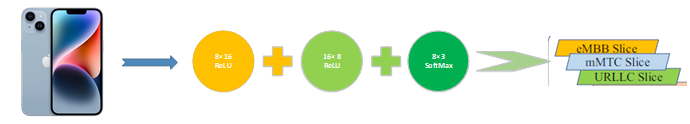

In [50]:
"buliding ANN"
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=8))

model.add(Dense(8,activation='relu'))

model.add(Dense(3,activation='softmax'))

# Compiling the model

we then convert the model selection that we have just created into a true model. Using categorical_crossentropy as loss function (which can be used in effectively the number of multi-class tasks) and the SGD optimizer, we instantiate the model.

ALL the details about optmization are mentiend in the word.doc

In [51]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the model

we then fit the training data to the model and provide a few configuration options defined earlier. The model will now start training with every epoch. Here, the number of epochs and the batch size are set in order to improve accuracy and performance, as these hyperparamters are very important in improving performance. It is worth noting that the validation of the performance of the model is determined through the validation data, which was previously set as part of the test data, where in each epochs the performance in terms of the matrices accuracy  is evaluated and its quality is measured.

In [52]:
hist=model.fit(X_train, y_train,
                    epochs =25,
                    batch_size = 3000,validation_data=(X_test, y_test))

Epoch 1/25
17/17 [==============================] - 1s 34ms/step - loss: 1.0101 - accuracy: 0.4946 - val_loss: 0.9713 - val_accuracy: 0.5161
Epoch 2/25
17/17 [==============================] - 0s 4ms/step - loss: 0.9368 - accuracy: 0.5360 - val_loss: 0.9079 - val_accuracy: 0.5477
Epoch 3/25
17/17 [==============================] - 0s 4ms/step - loss: 0.8801 - accuracy: 0.5643 - val_loss: 0.8566 - val_accuracy: 0.5775
Epoch 4/25
17/17 [==============================] - 0s 4ms/step - loss: 0.8331 - accuracy: 0.5872 - val_loss: 0.8130 - val_accuracy: 0.5981
Epoch 5/25
17/17 [==============================] - 0s 4ms/step - loss: 0.7924 - accuracy: 0.6061 - val_loss: 0.7745 - val_accuracy: 0.6171
Epoch 6/25
17/17 [==============================] - 0s 4ms/step - loss: 0.7561 - accuracy: 0.6239 - val_loss: 0.7396 - val_accuracy: 0.6344
Epoch 7/25
17/17 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.6395 - val_loss: 0.7072 - val_accuracy: 0.6494
Epoch 8/25
17/17 [=

# Evaluating the model

After the model is trained, we can evaluate it using model. Predict. Based on the testing dataset, we then know how well it performs when it is used on data that it has never seen before

In [53]:
y_pred = model.predict(X_test)

395/395 [==============================] - 0s 689us/step


# Model Performance Measurement:  

Tests of its final performance are now necessary. Additionally, the ANN are just another classification  technique, thus you may use any classification statistic to evaluate the outcome. You could make use of  accuracy matrices score It is worth noting that this step takes place after decoding the three cases from being binary to numeric, i.e. converting it from One Hot Encoder form to  form  Label Encoder. Then using accuracy matric to print the final result 

_This is done by using For Loop function ans append to convert all the predicted and actual target column from one-hot to labelencoder

In [54]:
#Converting predictions to label
# The predicted outputs
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
#Converting one hot encoded test label to label
# The actual outputs
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 95.41712838372646


# showing off


Now it is time to show the final stage of the results of the proposed code by drawing the training and validation curves

[]

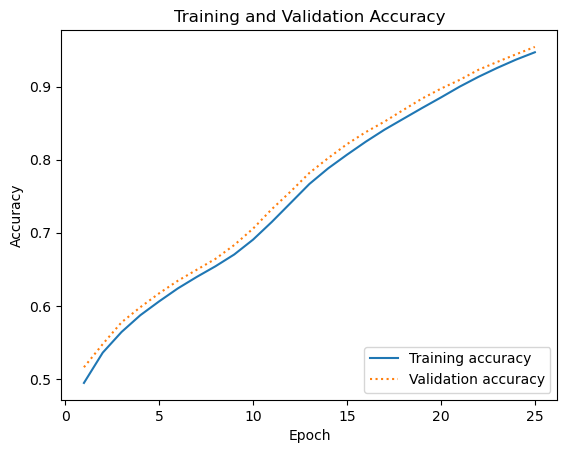

In [56]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# Conclusion

This model has achieved an accuracy of 95 percent, which indicates that this model is able to predict any new, usable, reliable and valid values.  As shown in the Fig above ,  the simulated result has a good result and the SGD is choose as an optimizer with batch size equal 3000 and epoch equal to 25 

-This idea offers a brilliant method of reducing congestion on cellular and home Wi-Fi transmission stations by giving all essential and responsive services first priority while routing all other services to the closest station